In [3]:
#Machine learning related imports 

import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import(Dense, Dropout, Activation, Flatten)
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

#To perform Http requests to update data 
import requests
#The key in the key-value pair aka dictionary must be equal to the name/id field of
#the model in django in models.py; in this case it is just "name". Any string that does
#not designate the title of a django model field will return a 400 error response code.
#201 means that post request to database thru API endpoint was successful
# r = requests.post('http://127.0.0.1:8000/tests/', json={"name":  "Chungus"})
# r.status_code

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [4]:
path = os.listdir("/media/dolan/Backup Plus/Bodybuilders")
len(path)

396

In [11]:
len(os.listdir("/media/dolan/Backup Plus/Natty"))

387

In [5]:
class Data:
    
    def __init__(self):
        self.bodybuilders = []
        self.natties = []
        self.training_data = []
        self.test_data = []
        self.path = "/media/dolan/Backup Plus/"
        self.IMG_SIZE = 75
    
    def generate(self, string): #string === pathnameend
        path = os.path.join(self.path, string)
        if string == 'Bodybuilders':
            class_num = 1
        elif string == 'Natty':
            class_num = 0
        else:
            return
        counter = 0
        for img in os.listdir(path):
            if class_num == 1:
                try:
                    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (self.IMG_SIZE,self.IMG_SIZE))
                    self.bodybuilders.append([new_array,class_num])
                except Exception as e:
                    pass     
            elif class_num == 0:
                try:
                    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (self.IMG_SIZE,self.IMG_SIZE))
                    self.natties.append([new_array,class_num])
                except Exception as e:
                    pass   
            else:
                print("Classnum is not valid friend")
                
            counter += 1
            
            print("Image resized: ", counter)


In [6]:
data = Data()
data.generate('Bodybuilders')
data.generate('Natty')

Image resized:  1
Image resized:  2
Image resized:  3
Image resized:  4
Image resized:  5
Image resized:  6
Image resized:  7
Image resized:  8
Image resized:  9
Image resized:  10
Image resized:  11
Image resized:  12
Image resized:  13
Image resized:  14
Image resized:  15
Image resized:  16
Image resized:  17
Image resized:  18
Image resized:  19
Image resized:  20
Image resized:  21
Image resized:  22
Image resized:  23
Image resized:  24
Image resized:  25
Image resized:  26
Image resized:  27
Image resized:  28
Image resized:  29
Image resized:  30
Image resized:  31
Image resized:  32
Image resized:  33
Image resized:  34
Image resized:  35
Image resized:  36
Image resized:  37
Image resized:  38
Image resized:  39
Image resized:  40
Image resized:  41
Image resized:  42
Image resized:  43
Image resized:  44
Image resized:  45
Image resized:  46
Image resized:  47
Image resized:  48
Image resized:  49
Image resized:  50
Image resized:  51
Image resized:  52
Image resized:  53
Im

Image resized:  96
Image resized:  97
Image resized:  98
Image resized:  99
Image resized:  100
Image resized:  101
Image resized:  102
Image resized:  103
Image resized:  104
Image resized:  105
Image resized:  106
Image resized:  107
Image resized:  108
Image resized:  109
Image resized:  110
Image resized:  111
Image resized:  112
Image resized:  113
Image resized:  114
Image resized:  115
Image resized:  116
Image resized:  117
Image resized:  118
Image resized:  119
Image resized:  120
Image resized:  121
Image resized:  122
Image resized:  123
Image resized:  124
Image resized:  125
Image resized:  126
Image resized:  127
Image resized:  128
Image resized:  129
Image resized:  130
Image resized:  131
Image resized:  132
Image resized:  133
Image resized:  134
Image resized:  135
Image resized:  136
Image resized:  137
Image resized:  138
Image resized:  139
Image resized:  140
Image resized:  141
Image resized:  142
Image resized:  143
Image resized:  144
Image resized:  145
Imag

In [125]:
data.natties

[[array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  0],
 [array([[197, 196, 195, ..., 196, 194, 193],
         [201, 200, 199, ..., 196, 194, 193],
         [200, 200, 198, ..., 198, 199, 199],
         ...,
         [198, 198, 198, ..., 201, 201, 201],
         [192, 192, 192, ..., 190, 190, 190],
         [188, 188, 188, ..., 184, 184, 185]], dtype=uint8),
  0],
 [array([[242, 242, 242, ..., 237, 237, 237],
         [242, 242, 242, ..., 237, 237, 237],
         [245, 245, 245, ..., 237, 237, 237],
         ...,
         [229, 229, 229, ..., 235, 236, 236],
         [230, 230, 230, ..., 234, 234, 234],
         [206, 218, 198, ..., 233, 233, 233]], dtype=uint8),
  0],
 [array([[107, 106, 105, ..., 119, 119, 110],
         [106, 105, 1

In [7]:
print(len(data.bodybuilders), len(data.natties))

396 387


In [9]:
#Shuffle the data
import random

data_ = data.bodybuilders + data.natties
print(len(data_))

random.shuffle(data_)

0.25 * len(data_),0.75 * len(data_) 


783


(195.75, 587.25)

In [10]:
len(data_[:587])

587

In [11]:
def generate_inputs(dataset):
    X = []
    y = []
    for i in range(len(dataset)):
        X.append(dataset[i][0])
        y.append(dataset[i][1])
        
    return X,y
        

training_data = data_[:587]
test_data = data_[587:]    
    
X_train, y_train = generate_inputs(training_data)
X_test, y_test = generate_inputs(test_data)
X, y = generate_inputs(data_)

In [12]:
len(X_train), len(y_test)

(587, 196)

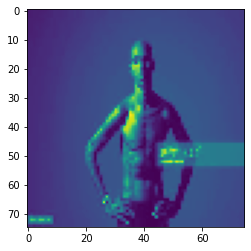

In [116]:
plt.imshow(X_train[5])

In [15]:
X_test[1].shape

(75, 75)

In [127]:
#Develop valid dataset by normalizing image arrays`

IMG_SIZE = data.IMG_SIZE
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE,1)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE,1) 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_train = X_train/255.0
X_test = X_test/255.0
X = X/255.0

y = np.array(y)

In [128]:
y.shape, X.shape

((783,), (783, 75, 75, 1))

In [129]:
X_test.shape

(196, 75, 75, 1)

In [131]:
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(3, 3)))


model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

# Training the model
### If loading the pretrained model (which you're supposed to do kinda) you can skip most of the above stuff and just start making predictions here

In [132]:
#model = keras.models.load_model("/home/dolan/Downloads/NattyOrNot/machine_learning/.ipynb_checkpoints/nattyornot.h5")
model = keras.models.load_model("/home/dolan/Downloads/NattyOrNot/backend/machine_learning/.ipynb_checkpoints/nattyornot.h5")

model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 73, 73, 256)       2560      
                                                                 
 activation_48 (Activation)  (None, 73, 73, 256)       0         
                                                                 
 dropout_35 (Dropout)        (None, 73, 73, 256)       0         
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 24, 24, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 22, 22, 256)       590080    
                                                                 
 activation_49 (Activation)  (None, 22, 22, 256)       0         
                                                     

In [175]:
'''Uncomment if you're training the model '''
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# model.fit(X, y,  batch_size = 15, epochs = 15, validation_split = 0.25)

Epoch 1/15
40/40 [==============================] - 35s 868ms/step - loss: 0.1592 - accuracy: 0.9523 - val_loss: 0.6454 - val_accuracy: 0.7500
Epoch 2/15
40/40 [==============================] - 40s 1s/step - loss: 0.1040 - accuracy: 0.9676 - val_loss: 0.7577 - val_accuracy: 0.7500
Epoch 3/15
40/40 [==============================] - 37s 931ms/step - loss: 0.1033 - accuracy: 0.9625 - val_loss: 0.7307 - val_accuracy: 0.7602
Epoch 4/15
40/40 [==============================] - 37s 922ms/step - loss: 0.0752 - accuracy: 0.9761 - val_loss: 0.7910 - val_accuracy: 0.7398
Epoch 5/15
40/40 [==============================] - 36s 894ms/step - loss: 0.0577 - accuracy: 0.9813 - val_loss: 0.9319 - val_accuracy: 0.7143
Epoch 6/15
40/40 [==============================] - 56s 1s/step - loss: 0.0684 - accuracy: 0.9761 - val_loss: 0.8401 - val_accuracy: 0.7398
Epoch 7/15
40/40 [==============================] - 54s 1s/step - loss: 0.0986 - accuracy: 0.9608 - val_loss: 0.8294 - val_accuracy: 0.7398
Epoch 8/

KeyboardInterrupt: 

In [144]:
X_test.shape
input_data = np.zeros(196 * 75 * 75 * 1).reshape(X_test.shape)
input_data.shape

(196, 75, 75, 1)

In [146]:
input_data[0].shape = most_recent_upload

ValueError: maximum supported dimension for an ndarray is 32, found 209

In [142]:
most_recent_upload.shape

(209, 241, 3)

In [148]:
#Predict whether the image is natty or not!!!

def predict(data, model):
#     IMG_SIZE = model.layers[0].input_shape[1] #Get size of input layer
#     resized_image = cv2.resize(data, (IMG_SIZE, IMG_SIZE))
#     #data = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     data = np.expand_dims(data, axis=0)
#     prediction_ = model.predict(data)
#     return prediction_
    if data.shape == (len(data), IMG_SIZE, IMG_SIZE, 1):
        preds = model.predict(data).tolist()
        
        for i in range(len(preds)):
            if preds[i][0] >= 0.5:
                preds[i] = 'Not'
            elif preds[i][0] < 0.5:
                preds[i] = 'Natty'
        
        return preds
    elif data.shape == (IMG_SIZE, IMG_SIZE, 1):
        data = np.expand_dims(data, axis = 0)
        pred = model.predict(data)
        if pred >= 0.5:
            pred = 'Not'
        else:
            pred = 'Natty'
            
        return pred
    
    else:
        return

    
#Retrieve the image from the media filepath 
 
#MEDIA = "/home/dolan/Downloads/NattyOrNot/backend/media"
# for image in os.listdir(MEDIA):
#     print(image)




#retrieval = requests.get("http://127.0.0.1:8000/media/images/pepe_aRLl8Fh.jpg")

In [7]:
retrieval()

TypeError: 'Response' object is not callable

In [149]:
preds = model.predict(X_test)

In [178]:
predict(X_test[8])

'Natty'

(<matplotlib.image.AxesImage at 0x7f939230c640>,
 array([0.5187222], dtype=float32))

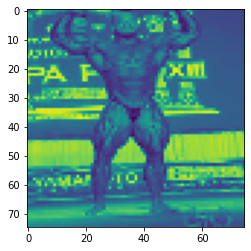

In [230]:
plt.imshow(X_test[1]), preds[1]

NameError: name 'preds' is not defined

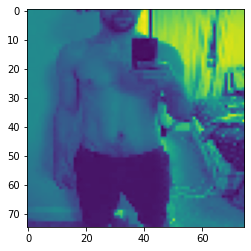

In [147]:
plt.imshow(X_test[7]), preds[7]

(<matplotlib.image.AxesImage at 0x7f9358a4ae50>,
 array([0.00461218], dtype=float32))

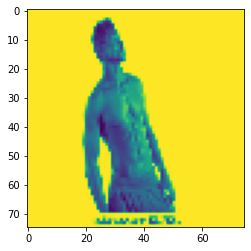

In [181]:
plt.imshow(X_test[2]), preds[2]

(<matplotlib.image.AxesImage at 0x7f9358a396d0>,
 array([0.9999578], dtype=float32))

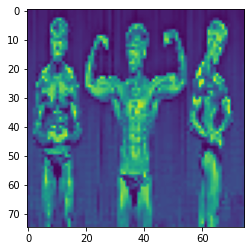

In [182]:
plt.imshow(X_test[35]), preds[35]

(<matplotlib.image.AxesImage at 0x7f9392503eb0>,
 array([0.998507], dtype=float32))

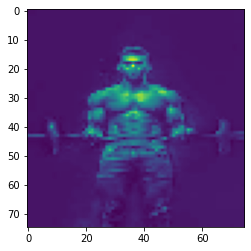

In [219]:
plt.imshow(X_test[171]), preds[171]

# Save The Model

In [221]:
#model.save("/home/dolan/Downloads/NattyOrNot/machine_learning/.ipynb_checkpoints/nattyornot.h5")

### Generate Stack to List Most recent Image

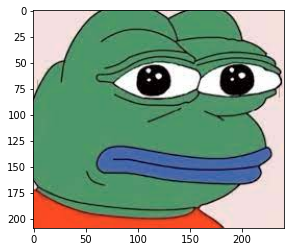

In [140]:
MEDIA = '/home/dolan/Downloads/NattyOrNot/backend/media/images/'
#len(path)

def generate(string): #string === pathnameend
    path = '/home/dolan/Downloads/NattyOrNot/backend/media/images/'
    path = os.path.join(path, string)
    IMG_SIZE = 75#125
    
    counter = 0
    
    arr = []
    
    try:
        img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        #arr.append([new_array,class_num])
    except Exception as e:
        pass     



        counter += 1

        print("Image resized: ", counter)
    return new_array


images_folder = os.listdir(MEDIA)
most_recent_upload_filename = images_folder.pop(0)
most_recent_upload = (MEDIA + most_recent_upload_filename)
most_recent_upload = cv2.imread(most_recent_upload)
#print(most_recent_upload)
plt.imshow(most_recent_upload)

In [58]:
model.layers[0].input_shape[1]
#most_recent_upload.shape

def predict(data, model):
    IMG_SIZE = model.layers[0].input_shape[1] #Get size of input layer
    resized_image = cv2.resize(data, (IMG_SIZE, IMG_SIZE))
    #data = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    data = np.expand_dims(data, axis=0)
    prediction_ = model.predict(data)
    return prediction_

75

(209, 241, 3)
(75, 75, 3)


ValueError: in user code:

    File "/home/dolan/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/home/dolan/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/dolan/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/home/dolan/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/home/dolan/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/dolan/.local/lib/python3.8/site-packages/keras/engine/input_spec.py", line 247, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_13" (type Sequential).
    
    Input 0 of layer "conv2d_35" is incompatible with the layer: expected axis -1of input shape to have value 1, but received input with shape (None, 75, 75, 3)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 75, 75, 3), dtype=uint8)
      • training=False
      • mask=None


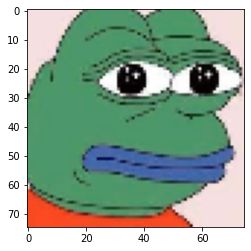

In [143]:
# most_recent_upload = cv2.cvtColor(most_recent_upload, cv2.COLOR_BGR2GRAY)
plt.imshow(most_recent_upload), 
print(most_recent_upload.shape)
data = cv2.resize(most_recent_upload, (75, 75))
plt.imshow(data)
print(data.shape)
#cv2.resize(most_recent_upload, ())
#plt.imshow(MEDIA + most_recent_upload)
data = np.expand_dims(data, axis=0)
prediction_ = model.predict(data)
if prediction_ >= 0.5:
    print("Natty")
else:
    print("Not")
print(np.argmax(prediction_))


In [77]:
img_array = generate(most_recent_upload)
img_array

array([[ 30,  45,  48, ...,  77,  86,  82],
       [ 78,  73,  47, ...,  70,  88,  84],
       [ 54,  62,  34, ...,  83, 171, 205],
       ...,
       [ 34,  41,  47, ...,  67,  67,  64],
       [ 43,  43,  43, ...,  67,  65,  66],
       [ 45,  45,  45, ...,  68,  67,  66]], dtype=uint8)

In [78]:
#Convert to numpy array in order to feed data to neural network
IMG_SIZE = 75#125
img_array_ = np.array(img_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
img_array_ = img_array_/255.0


In [79]:
img_array.shape, img_array_.shape, img_array_

((75, 75),
 (1, 75, 75, 1),
 array([[[[0.11764706],
          [0.17647059],
          [0.18823529],
          ...,
          [0.30196078],
          [0.3372549 ],
          [0.32156863]],
 
         [[0.30588235],
          [0.28627451],
          [0.18431373],
          ...,
          [0.2745098 ],
          [0.34509804],
          [0.32941176]],
 
         [[0.21176471],
          [0.24313725],
          [0.13333333],
          ...,
          [0.3254902 ],
          [0.67058824],
          [0.80392157]],
 
         ...,
 
         [[0.13333333],
          [0.16078431],
          [0.18431373],
          ...,
          [0.2627451 ],
          [0.2627451 ],
          [0.25098039]],
 
         [[0.16862745],
          [0.16862745],
          [0.16862745],
          ...,
          [0.2627451 ],
          [0.25490196],
          [0.25882353]],
 
         [[0.17647059],
          [0.17647059],
          [0.17647059],
          ...,
          [0.26666667],
          [0.2627451 ],
          [

In [80]:
model.predict(img_array_) 

array([[0.6355746]], dtype=float32)

(<matplotlib.image.AxesImage at 0x7f931867d670>,
 array([[0.6355746]], dtype=float32))

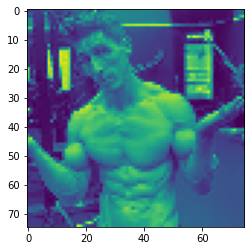

In [81]:
plt.imshow(img_array), model.predict(img_array_)

('Not',
 array([0.63557464], dtype=float32))

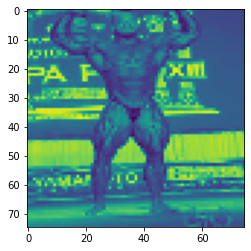

In [82]:
predict(X_test[1]), plt.imshow(X_test[1]), preds[1]

In [83]:
images_path

['Angel_Of_Death.jpg',
 'moi.jpg',
 'meals.jpg',
 'Angel_Of_Death_1RAngKg.jpg',
 'meals_jczglqC.jpg']

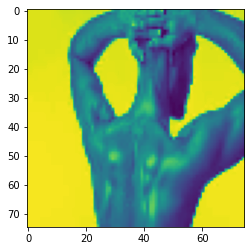

In [84]:
plt.imshow(X_test[31])

array([[0.63557464],
       [0.63557464],
       [0.63557464],
       [0.63557464],
       [0.63557464],
       [0.63557464],
       [0.63557464],
       [0.63557464],
       [0.63557464],
       [0.63557464],
       [0.63557464]], dtype=float32)